In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from statsmodels import api
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from pickle import dump 
from numpy import log

## 1.Load data

In [2]:
data = pd.read_csv('Datasets/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## 2.Data Analysis

In [4]:
data.shape

(21, 2)

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## 3.Data processing

In [3]:
#lets rename the columns for our convinience
data.columns = ['Delivery_Time','Sorting_Time']
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
#applying Log transformation to the predictor
data['Delivery_Time'] = log(data['Delivery_Time'])


## 4. Assumption checks for linear Regression
### 4.1 Linearity check using catter plot

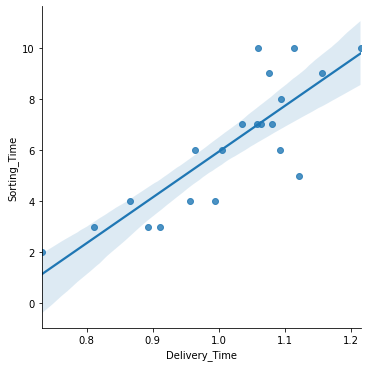

In [7]:
sns.lmplot(x='Delivery_Time',y='Sorting_Time',data=data)
plt.show()

#the data looks pretty linear 

In [8]:
data.corr()

#'Sorting Time' and 'Delivery Time' are 84% strogly positively realeted

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.840057
Sorting_Time,0.840057,1.000000


## check for multicolinearity doest make sence as there is only one predictor and there are no Datetime type predictore so no time series problem

## 5. Seperating X and y and standardising X

In [9]:
X = data.drop(labels='Sorting_Time',axis=1)
X.head()

,Delivery_Time
0,1.113344
1,0.956545
2,1.092981
3,1.156269
4,1.214110


In [10]:
y = data.Sorting_Time

## 6. Model Building

### train test spliting

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16, 1), (5, 1), (16,), (5,))

### model building

In [12]:
sorting_time_pred = LinearRegression()

## 7.Model training

In [13]:
sorting_time_pred = sorting_time_pred.fit(X_train,y_train)

## 8.Model testing and evalution usin train data

In [14]:
y_train_pred = sorting_time_pred.predict(X_train)

In [15]:
train_residuals = y_train-y_train_pred

In [16]:
sorting_time_pred.score(X_train,y_train)
#rsquare

0.8069412167157395

In [17]:
metrics.mean_absolute_error(y_train,y_train_pred)

0.7950010122478297

In [18]:
metrics.mean_squared_error(y_train,y_train_pred)

1.0618233080634332

## 9.1 Residual Normality check

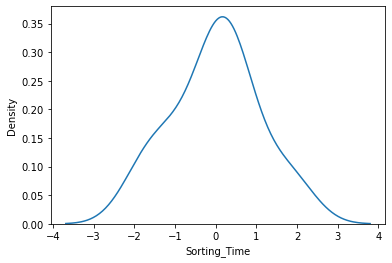

In [19]:
#checking if residuals are normally distributed
plt.xlabel('train residuals')
sns.distplot(train_residuals,hist=False)
plt.show()

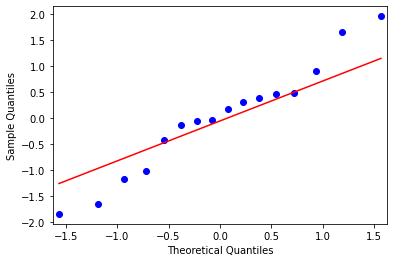

In [20]:
qq = api.qqplot(train_residuals,line='q')

## 9.2 Homoscedasticity check.. check for equal varience of residuals

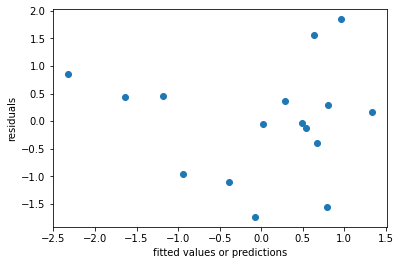

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(y_train_pred),get_standardized_values(train_residuals))
plt.xlabel('fitted values or predictions')
plt.ylabel('residuals')
plt.show()

In [50]:
#residual doesnot have a constant varience

## 10.Model Testing  and evaluation for test data

In [22]:
y_test_pred = sorting_time_pred.predict(X_test)

In [23]:
sorting_time_pred.score(X_test,y_test)

0.45634728999097385

In [24]:
metrics.mean_absolute_error(y_test,y_test_pred)

1.659969277726465

In [25]:
metrics.mean_squared_error(y_test,y_test_pred)

4.2187450296700435

## Liniear Regression algorithm is not the best fit for this model

## 11.Model deployment

In [26]:
dump(sorting_time_pred,open('Sorting_time_pred.pkl','wb'))